In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from plotnine import *
%matplotlib inline

In [3]:
# Read in College Data CSV
college_data = pd.read_csv('college-records.csv')

In [4]:
college_data.head(10)

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type of College,...,2016,2017,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,Ownership
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,college-type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ownership
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Catholic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
5,us-west,USC,Private,"$63,468","20,790",21.10%,43,Urban,46 : 54,Research,...,-5.392547,-7.123969,-3.919732,-2.692837,-5.143249,-2.996033,-0.472082,-0.225776,452.264168,Independent
6,us-west,University of Washington,Public,"$40,740","30,856",53.50%,NaN,Urban,45 : 55,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
7,us-west,Harvey Mudd College,Private,"$62,516",905,10%,28,Suburban,50 : 50,Science & Engineering,...,NaN,-0.075550,NaN,NaN,0.761180,0.151384,0.425327,NaN,NaN,Independent
8,us-west,Pomona College,Private,"$59,238","1,764",6.60%,16,Suburban,45 : 55,Liberal Arts,...,-5.927530,-8.535499,-8.483771,-5.880843,-7.086419,-6.771482,NaN,-0.570280,1144.353493,Independent
9,us-west,UCLA,Public,"$13,804","31,600",10.80%,35,Urban,44 : 56,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent


In [23]:
pub_pri = []
slope = []

pri = []
pub = []

for _, row in college_data.iterrows():
    if not pd.isna(row['Bipartisan Slope']):
        if row['Public / Private'] == 'Private':
            pri.append(row['Bipartisan Slope'])
        else:
            pub.append(row['Bipartisan Slope'])
        
        pub_pri.append(row['Public / Private'])
        slope.append(row['Bipartisan Slope'])

print(pri)
print(pub)
print(pub_pri)
print(slope)

[-0.2257762422, -0.570279725, -0.3868863195, -0.289261152, -0.4433516484, -0.5545454545, -0.266043956, 0.1124224544, -0.4319499284, -0.2975834064, 0.003752946402, -0.4857387104, -0.1194370756, -0.3436421704, 0.1435299767, -0.3899215764, -0.7150474216, 0.0854016465, -0.4733300771]
[0.289383408, 0.1628396987, -0.4584491801, -0.2275281465, -0.241352111, -0.08839584011, -0.3653387655, -0.2610306175, 0.6635422148]
['Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Public', 'Public', 'Private', 'Public', 'Public', 'Private', 'Private', 'Public', 'Private', 'Private', 'Public', 'Private', 'Private', 'Public', 'Public', 'Public']
[-0.2257762422, -0.570279725, -0.3868863195, -0.289261152, -0.4433516484, -0.5545454545, -0.266043956, 0.1124224544, -0.4319499284, -0.2975834064, 0.003752946402, -0.4857387104, 0.289383408, 0.1628396987, -0.1194370756, -0.4584491801, -0.2275281465, -0.3436421704, 0.1435299767, -0.24135

# Two Sample T Test

In [29]:
print(np.var(np.array(pri, dtype=np.float64)))
print(np.var(np.array(pub, dtype=np.float64)))

# Cannot assume equal variance as private school variance is less than half of the public school variance
stats.ttest_ind(a=pri, b=pub, equal_var=False)

0.05668447312453732
0.11659847558476555


Ttest_indResult(statistic=-1.7934600285711688, pvalue=0.09900869964764185)

In [6]:
df = pd.DataFrame({
    'Institution': pub_pri,
    'Bipartisan Slope': slope
})

In [7]:
df

,Institution,Bipartisan Slope
0,Private,-0.225776
1,Private,-0.570280
2,Private,-0.386886
3,Private,-0.289261
4,Private,-0.443352
5,Private,-0.554545
6,Private,-0.266044
7,Private,0.112422
8,Private,-0.431950
9,Private,-0.297583


In [8]:
df['Institution'] = pd.Categorical(df['Institution'], categories=['Public', 'Private'])

In [9]:
plot = (ggplot(df) +
  geom_boxplot(aes(y = 'Bipartisan Slope', x = 'factor(Institution)', fill = 'Institution')) +
  coord_flip() +
  xlab("Institution Type") +
  labs(fill="Institution Type") +
  ggtitle("Bipartisan Trends in Public / Private Institutions")
)

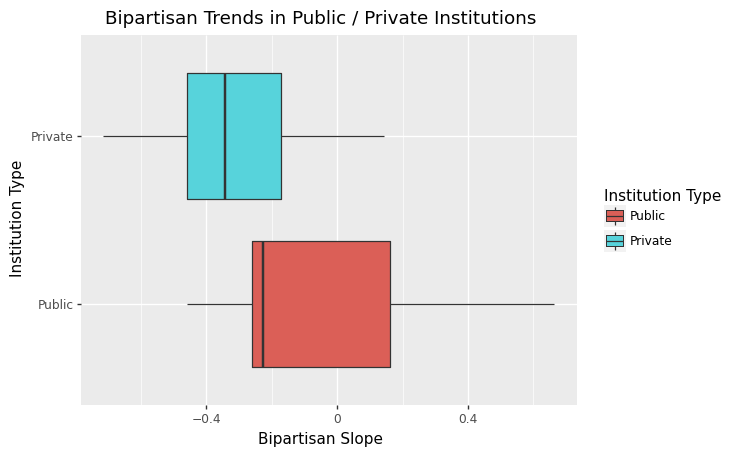

<ggplot: (8756820625117)>

In [10]:
plot

In [57]:
plot.save(filename = 'pub_pri.png', dpi=1000)

/home/harry/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/harry/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: pub_pri.png


In [11]:
college_data.head()

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type of College,...,2016,2017,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,Ownership
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,college-type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ownership
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Catholic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent


In [13]:
geo = []
slope = []

for _, row in college_data.iterrows():
    if not pd.isna(row['Bipartisan Slope']):
        geo.append(row['Geographic location'])
        slope.append(row['Bipartisan Slope'])
        
print(geo)
print(slope)

['Urban', 'Suburban', 'Suburban', 'Urban', 'Suburban', 'Suburban', 'Suburban', 'Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Suburban', 'Urban', 'Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Rural', 'Rural', 'Rural', 'Urban', 'Urban']
[-0.2257762422, -0.570279725, -0.3868863195, -0.289261152, -0.4433516484, -0.5545454545, -0.266043956, 0.1124224544, -0.4319499284, -0.2975834064, 0.003752946402, -0.4857387104, 0.289383408, 0.1628396987, -0.1194370756, -0.4584491801, -0.2275281465, -0.3436421704, 0.1435299767, -0.241352111, -0.3899215764, -0.7150474216, -0.08839584011, 0.0854016465, -0.4733300771, -0.3653387655, -0.2610306175, 0.6635422148]


In [15]:
df = pd.DataFrame({
    'Geography': geo,
    'bs': slope
})

df['Geography'] = pd.Categorical(df['Geography'], categories=['Urban', 'Suburban', 'Rural'])

df

,Geography,bs
0,Urban,-0.225776
1,Suburban,-0.570280
2,Suburban,-0.386886
3,Urban,-0.289261
4,Suburban,-0.443352
5,Suburban,-0.554545
6,Suburban,-0.266044
7,Urban,0.112422
8,Urban,-0.431950
9,Urban,-0.297583


# ANOVA

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('bs ~ C(Geography)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Geography),0.357143,2.0,2.10837,0.142513
Residual,2.117411,25.0,NaN,NaN


In [18]:
anova_table.to_clipboard()

In [48]:
plot = (ggplot(df) +
  geom_boxplot(aes(y = 'Bipartisan Slope', x = 'factor(Geography)', fill = 'Geography')) +
  coord_flip() +
  xlab("Location") +
  labs(fill="Geographic Location") +
  ggtitle("Bipartisan Trends in Different Geographic Locations")
)

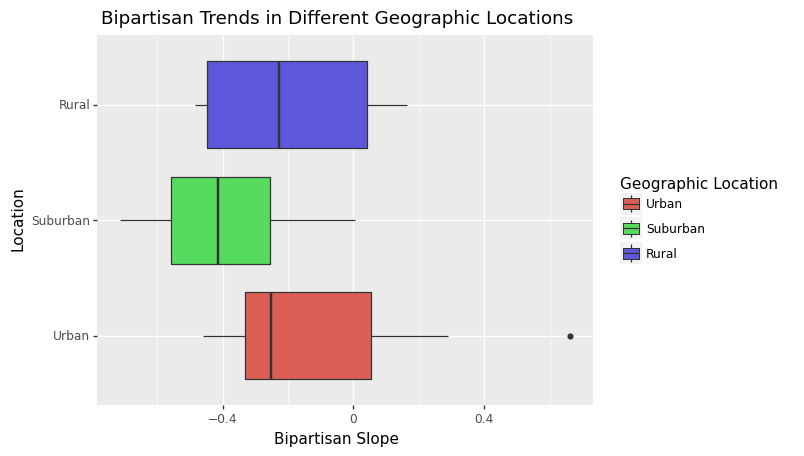

<ggplot: (8744001160000)>

In [49]:
plot

In [50]:
plot.save(filename = 'geo.png', dpi=1000)

/home/harry/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/harry/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: geo.png


In [15]:
usloc = []
slope = []

for _, row in college_data.iterrows():
    if not pd.isna(row['Bipartisan Slope']):
        usloc.append(row[0])
        slope.append(row['Bipartisan Slope'])
        
print(usloc)
print(slope)

['us-west', 'us-west', 'us-west', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest']
[-0.2257762422, -0.570279725, -0.3868863195, -0.289261152, -0.4433516484, -0.5545454545, -0.266043956, 0.1124224544, -0.4319499284, -0.2975834064, 0.003752946402, -0.4857387104, 0.289383408, 0.1628396987, -0.1194370756, -0.4584491801, -0.2275281465, -0.3436421704, 0.1435299767, -0.241352111, -0.3899215764, -0.7150474216, -0.08839584011, 0.0854016465, -0.4733300771, -0.3653387655, -0.2610306175, 0.6635422148]


In [29]:
df = pd.DataFrame({
    'Geography': usloc,
    'bs': slope
})

df['Geography'] = pd.Categorical(df['Geography'], categories=['us-west', 'us-south', 'us-northeast', 'us-midwest'])

df

,Geography,bs
0,us-west,-0.225776
1,us-west,-0.570280
2,us-west,-0.386886
3,us-northeast,-0.289261
4,us-northeast,-0.443352
5,us-northeast,-0.554545
6,us-northeast,-0.266044
7,us-northeast,0.112422
8,us-northeast,-0.431950
9,us-northeast,-0.297583


In [39]:
plot = (ggplot(df) +
  geom_boxplot(aes(y = 'bs', x = 'factor(Geography)', fill = 'Geography')) +
  coord_flip() +
  ylab("Bipartisan Slope") +
  xlab("US Regions") +
  labs(fill="US Region") +
  ggtitle("Bipartisan Trends in Different US Regions")
)

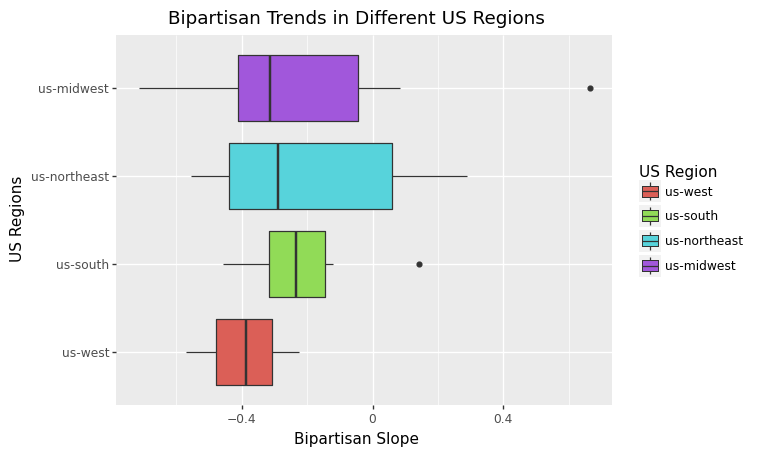

<ggplot: (8744001305171)>

In [40]:
plot

In [41]:
plot.save(filename = 'regions.png', dpi=1000)

/home/harry/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/harry/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: regions.png


# Anova Analysis on Difference in Mean Slope of Bipartisan Trend Across US Regions

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('bs ~ C(Geography)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Geography),0.102263,3.0,0.344857,0.793131
Residual,2.372291,24.0,NaN,NaN


In [42]:
anova_table.to_clipboard()

In [5]:
ind = []
slope = []

for _, row in college_data.iterrows():
    if not pd.isna(row['Ownership']):
        ind.append(row[0])
        slope.append(row['Ownership'])
        
print(ind)
print(slope)

['region', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest']
['ownership', 'Independent', 'Independent', 'Independent', 'Independent', 'Independent', 'Independent', 'Independent', 'Independent ', 'Independent ', 'Dependent ', 'Independent ', 'Independent ', 'Independent', 'Independent', 'Dependent', 'independent', 'independent', 'independent', 'Independent', 'independent', 'Independent', 'Independent', 'Dependent', 'Independent', 'Dependent', 'Independent', 'Independent', 'Indepe

# Multivariate Analysis

In [30]:
college_data.head(5)

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type of College,...,2016,2017,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,Ownership
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,college-type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ownership
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Catholic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent


In [31]:
df = pd.DataFrame({
    'Pubpriv': pub_pri,
    'Geography': geo,
    'bs': slope
})

df['Geography'] = pd.Categorical(df['Geography'], categories=['Urban', 'Suburban', 'Rural'])
df['Pubpriv'] = pd.Categorical(df['Pubpriv'], categories=['Public', 'Private'])

df

,Pubpriv,Geography,bs
0,Private,Urban,-0.225776
1,Private,Suburban,-0.570280
2,Private,Suburban,-0.386886
3,Private,Urban,-0.289261
4,Private,Suburban,-0.443352
5,Private,Suburban,-0.554545
6,Private,Suburban,-0.266044
7,Private,Urban,0.112422
8,Private,Urban,-0.431950
9,Private,Urban,-0.297583


In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('bs ~ C(Pubpriv) + C(Geography) + C(Geography):C(Pubpriv)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Pubpriv),0.221031,1.0,2.564376,0.123558
C(Geography),0.230011,2.0,1.334283,0.283835
C(Geography):C(Pubpriv),0.000137,2.0,0.000794,0.999206
Residual,1.896243,22.0,NaN,NaN
